_Pima Indians Diabetes Prediction - v2_

Examine the Pima Indians data using Tensorflow to create a binary classifier.

Version 2 - Let's try some EDA techniques I saw on dPhi.

Import the necessary libraries.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras

from matplotlib import pyplot as plt
import seaborn as sbn

Read in the data to a Pandas dataframe. Separate into training and test sets. Mixture of code picked up from:

    - https://www.tensorflow.org/tutorials/load_data/pandas_dataframe
    - https://pythonhealthcare.org/2018/12/22/112-splitting-data-set-into-training-and-test-sets-using-pandas-dataframes-methods/
    

In [2]:
data_path = "./data/pima-indians-diabetes.csv"
COLUMNS = ['times_pregnant', 'plasma_glucose', 'diastolic_pressure', 'triceps_skin_thickness', '2hr_serum_insulin', 'bmi', 'diabetes_pedigree_fn', 'age', 'class_var']
data = pd.read_csv(data_path, names=COLUMNS)

print(data.head())

   times_pregnant  plasma_glucose  diastolic_pressure  triceps_skin_thickness  \
0               6             148                  72                      35   
1               1              85                  66                      29   
2               8             183                  64                       0   
3               1              89                  66                      23   
4               0             137                  40                      35   

   2hr_serum_insulin   bmi  diabetes_pedigree_fn  age  class_var  
0                  0  33.6                 0.627   50          1  
1                  0  26.6                 0.351   31          0  
2                  0  23.3                 0.672   32          1  
3                 94  28.1                 0.167   21          0  
4                168  43.1                 2.288   33          1  


In [3]:
data.describe()

,times_pregnant,plasma_glucose,diastolic_pressure,triceps_skin_thickness,2hr_serum_insulin,bmi,diabetes_pedigree_fn,age,class_var
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   times_pregnant          768 non-null    int64  
 1   plasma_glucose          768 non-null    int64  
 2   diastolic_pressure      768 non-null    int64  
 3   triceps_skin_thickness  768 non-null    int64  
 4   2hr_serum_insulin       768 non-null    int64  
 5   bmi                     768 non-null    float64
 6   diabetes_pedigree_fn    768 non-null    float64
 7   age                     768 non-null    int64  
 8   class_var               768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


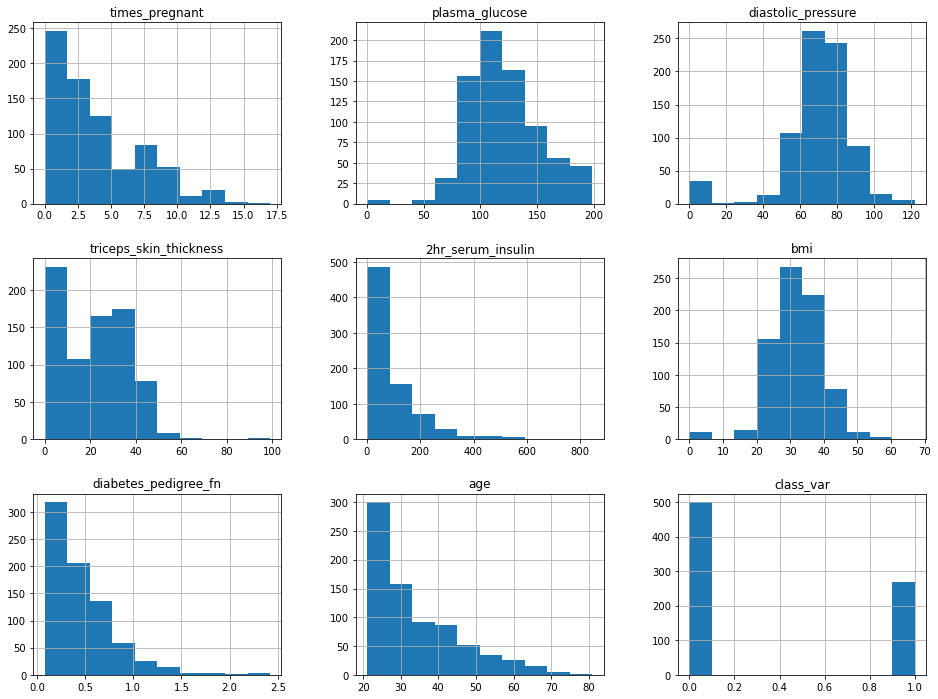

In [8]:
# Histogram
data.hist(bins=10, figsize=(16,12))
plt.show()

<AxesSubplot:>

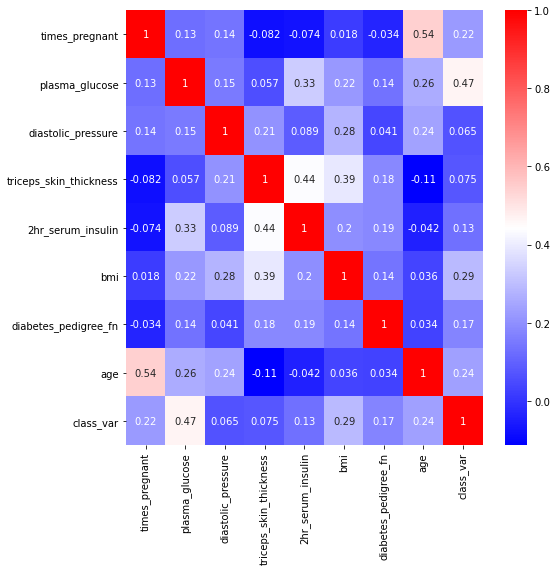

In [10]:
# Correlation Matrix
plt.figure(figsize=(8,8))

sbn.heatmap(data.corr(), cmap='bwr', annot=True)

In [ ]:
# Setup training and test data
training_data = data.sample(frac=0.75, random_state=0)
test_data = data.drop(training_data.index)

train_x = training_data
train_y = training_data.pop('class_var')
test_x = test_data
test_y = test_data.pop('class_var')

train_dataset = tf.data.Dataset.from_tensor_slices((train_x.values, train_y.values)).shuffle(len(data)).batch(1)
test_dataset = tf.data.Dataset.from_tensor_slices((test_x.values, test_y.values)).shuffle(len(data)).batch(1)

Build the model.

In [58]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Test fit the model.

In [68]:
history = model.fit(train_dataset, epochs=10, validation_data = test_dataset)

Train for 576 steps, validate for 192 steps
Epoch 1/10
576/576 [==============================] - 1s 2ms/step - loss: 0.5545 - accuracy: 0.7153 - val_loss: 0.6467 - val_accuracy: 0.7031
Epoch 2/10
576/576 [==============================] - 1s 2ms/step - loss: 0.5720 - accuracy: 0.7170 - val_loss: 0.6099 - val_accuracy: 0.6927
Epoch 3/10
576/576 [==============================] - 1s 2ms/step - loss: 0.5647 - accuracy: 0.7066 - val_loss: 0.6279 - val_accuracy: 0.6719
Epoch 4/10
576/576 [==============================] - 1s 2ms/step - loss: 0.5544 - accuracy: 0.6979 - val_loss: 0.6278 - val_accuracy: 0.6771
Epoch 5/10
576/576 [==============================] - 1s 2ms/step - loss: 0.5449 - accuracy: 0.7205 - val_loss: 0.5944 - val_accuracy: 0.6667
Epoch 6/10
576/576 [==============================] - 1s 2ms/step - loss: 0.5369 - accuracy: 0.7292 - val_loss: 0.6172 - val_accuracy: 0.6875
Epoch 7/10
576/576 [==============================] - 1s 2ms/step - loss: 0.5455 - accuracy: 0.7222 - va

In [69]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             multiple                  90        
_________________________________________________________________
dense_31 (Dense)             multiple                  110       
_________________________________________________________________
dense_32 (Dense)             multiple                  11        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.evaluate(test_dataset)

192/192 [==============================] - 0s 987us/step - loss: 0.5942 - accuracy: 0.6719


[0.5942148126923712, 0.671875]

In [5]:
def plot_acc_loss(history):
    %matplotlib inline

    import matplotlib.pyplot as plt

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', 'Training Accuracy')
    plt.plot(epochs, val_acc, 'b', 'Validation Accuracy')
    plt.title('Accuracy - Training vs Testing')
    plt.figure()

    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))

    plt.plot(epochs, loss, 'r', 'Training Loss')
    plt.plot(epochs, val_loss, 'b', 'Validation Loss')
    plt.title('Loss - Training vs Testing')
    plt.figure()

plot_acc_loss(history)

NameError: name 'history' is not defined

Let's examine some of the data.

In [97]:
print(data.head())

   times_pregnant  plasma_glucose  diastolic_pressure  triceps_skin_thickness  \
0               6             148                  72                      35   
1               1              85                  66                      29   
2               8             183                  64                       0   
3               1              89                  66                      23   
4               0             137                  40                      35   

   2hr_serum_insulin   bmi  diabetes_pedigree_fn  age  class_var  
0                  0  33.6                 0.627   50          1  
1                  0  26.6                 0.351   31          0  
2                  0  23.3                 0.672   32          1  
3                 94  28.1                 0.167   21          0  
4                168  43.1                 2.288   33          1  


In [111]:
empty_2hr_serum = [si_val == 0 for si_val in data['2hr_serum_insulin']]
print('Number of empty values in 2hr Serum Insulin column: ', sum(empty_2hr_serum), '/', len(data))

Number of empty values in 2hr Serum Insulin column:  374 / 768


Remove 2hr Serum Insulin column as probably having too many 0 values skewing the data.

In [6]:
data.pop('2hr_serum_insulin')

print(data.head())

training_data = data.sample(frac=0.75, random_state=0)
test_data = data.drop(training_data.index)

train_x = training_data
train_y = training_data.pop('class_var')
test_x = test_data
test_y = test_data.pop('class_var')

train_dataset = tf.data.Dataset.from_tensor_slices((train_x.values, train_y.values)).shuffle(len(data)).batch(1)
test_dataset = tf.data.Dataset.from_tensor_slices((test_x.values, test_y.values)).shuffle(len(data)).batch(1)

   times_pregnant  plasma_glucose  diastolic_pressure  triceps_skin_thickness  \
0               6             148                  72                      35   
1               1              85                  66                      29   
2               8             183                  64                       0   
3               1              89                  66                      23   
4               0             137                  40                      35   

    bmi  diabetes_pedigree_fn  age  class_var  
0  33.6                 0.627   50          1  
1  26.6                 0.351   31          0  
2  23.3                 0.672   32          1  
3  28.1                 0.167   21          0  
4  43.1                 2.288   33          1  


Rerun model.

In [101]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model1.fit(train_dataset, epochs=10, validation_data = test_dataset)

Train for 576 steps, validate for 192 steps
Epoch 1/10
576/576 [==============================] - 2s 3ms/step - loss: 1.6659 - accuracy: 0.5868 - val_loss: 1.2965 - val_accuracy: 0.6667
Epoch 2/10
576/576 [==============================] - 1s 2ms/step - loss: 0.9374 - accuracy: 0.6163 - val_loss: 0.8274 - val_accuracy: 0.5990
Epoch 3/10
576/576 [==============================] - 1s 2ms/step - loss: 0.7607 - accuracy: 0.6476 - val_loss: 0.7480 - val_accuracy: 0.6979
Epoch 4/10
576/576 [==============================] - 1s 2ms/step - loss: 0.7057 - accuracy: 0.6562 - val_loss: 0.8729 - val_accuracy: 0.6667
Epoch 5/10
576/576 [==============================] - 1s 2ms/step - loss: 0.6754 - accuracy: 0.6875 - val_loss: 0.6691 - val_accuracy: 0.6562
Epoch 6/10
576/576 [==============================] - 1s 2ms/step - loss: 0.7073 - accuracy: 0.6580 - val_loss: 0.6612 - val_accuracy: 0.6979
Epoch 7/10
576/576 [==============================] - 1s 2ms/step - loss: 0.6539 - accuracy: 0.6892 - va

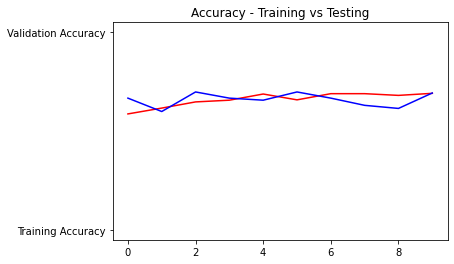

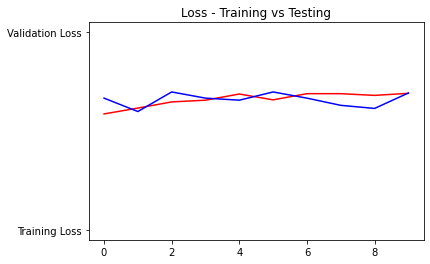

<Figure size 432x288 with 0 Axes>

In [103]:
plot_acc_loss(history)

In [112]:
empty_triceps_skin_thickness = [si_val == 0 for si_val in data['triceps_skin_thickness']]
print('Number of empty values in Triceps Skin Fold Thickness column: ', sum(empty_triceps_skin_thickness), '/', len(data))

Number of empty values in Triceps Skin Fold Thickness column:  227 / 768


Let's try removing Tricep Skin Thickness.

In [7]:
data.pop('triceps_skin_thickness')

print(data.head())

training_data = data.sample(frac=0.75, random_state=0)
test_data = data.drop(training_data.index)

train_x = training_data
train_y = training_data.pop('class_var')
test_x = test_data
test_y = test_data.pop('class_var')

train_dataset = tf.data.Dataset.from_tensor_slices((train_x.values, train_y.values)).shuffle(len(data)).batch(1)
test_dataset = tf.data.Dataset.from_tensor_slices((test_x.values, test_y.values)).shuffle(len(data)).batch(1)

   times_pregnant  plasma_glucose  diastolic_pressure   bmi  \
0               6             148                  72  33.6   
1               1              85                  66  26.6   
2               8             183                  64  23.3   
3               1              89                  66  28.1   
4               0             137                  40  43.1   

   diabetes_pedigree_fn  age  class_var  
0                 0.627   50          1  
1                 0.351   31          0  
2                 0.672   32          1  
3                 0.167   21          0  
4                 2.288   33          1  


In [20]:
def fit_model(train_dataset, test_dataset, epochs = 10, learning_rate=0.001, layer_nodes = [10, 10, 1]):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(layer_nodes[0], activation='relu'),
        tf.keras.layers.Dense(layer_nodes[1], activation='relu'),
        tf.keras.layers.Dense(layer_nodes[2], activation='sigmoid')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(train_dataset, epochs=epochs, validation_data = test_dataset)

    return history

#history = fit_model(train_dataset, test_dataset, 50)

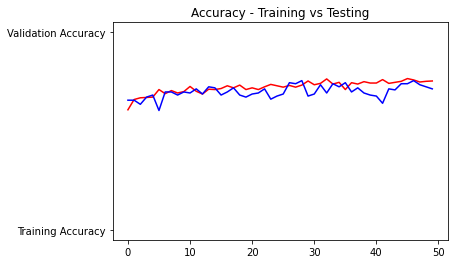

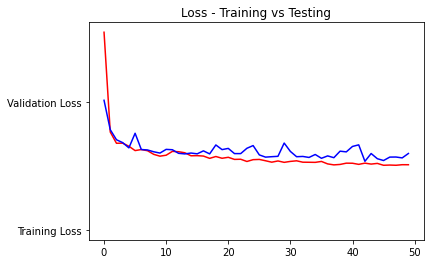

<Figure size 432x288 with 0 Axes>

In [15]:
plot_acc_loss(history)

Let's normalise some of the data and see how it goes.

In [10]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

data['plasma_glucose_minmax'] = MinMaxScaler().fit_transform(data[['plasma_glucose']])

data.pop('plasma_glucose')

print(data.head())

   times_pregnant  diastolic_pressure   bmi  diabetes_pedigree_fn  age  \
0               6                  72  33.6                 0.627   50   
1               1                  66  26.6                 0.351   31   
2               8                  64  23.3                 0.672   32   
3               1                  66  28.1                 0.167   21   
4               0                  40  43.1                 2.288   33   

   class_var  plasma_glucose_minmax  
0          1               0.743719  
1          0               0.427136  
2          1               0.919598  
3          0               0.447236  
4          1               0.688442  


In [12]:
history = fit_model(train_dataset, test_dataset, 50)

Train for 576 steps, validate for 192 steps
Epoch 1/50
576/576 [==============================] - 2s 3ms/step - loss: 1.0917 - accuracy: 0.6024 - val_loss: 0.8314 - val_accuracy: 0.5990
Epoch 2/50
576/576 [==============================] - 1s 2ms/step - loss: 0.6718 - accuracy: 0.6788 - val_loss: 0.6710 - val_accuracy: 0.5990
Epoch 3/50
576/576 [==============================] - 1s 2ms/step - loss: 0.6336 - accuracy: 0.6649 - val_loss: 0.7849 - val_accuracy: 0.6719
Epoch 4/50
576/576 [==============================] - 1s 2ms/step - loss: 0.6218 - accuracy: 0.6979 - val_loss: 0.6322 - val_accuracy: 0.7031
Epoch 5/50
576/576 [==============================] - 1s 2ms/step - loss: 0.5977 - accuracy: 0.6962 - val_loss: 0.6345 - val_accuracy: 0.7083
Epoch 6/50
576/576 [==============================] - 1s 2ms/step - loss: 0.6014 - accuracy: 0.7031 - val_loss: 0.6733 - val_accuracy: 0.5990
Epoch 7/50
576/576 [==============================] - 1s 2ms/step - loss: 0.5863 - accuracy: 0.6997 - va

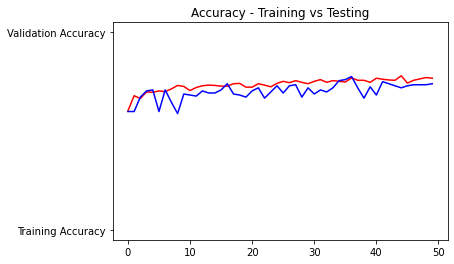

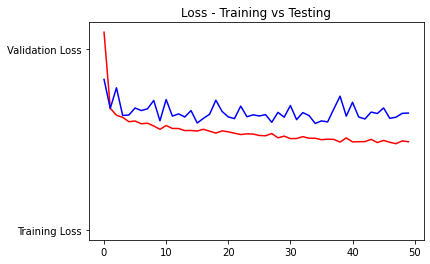

<Figure size 432x288 with 0 Axes>

In [13]:
plot_acc_loss(history)

Try minmaxing some more data.

In [17]:

data['age_minmax'] = MinMaxScaler().fit_transform(data[['age']])
data['diastolic_pressure_minmax'] = MinMaxScaler().fit_transform(data[['diastolic_pressure']])
data['bmi_minmax'] = MinMaxScaler().fit_transform(data[['bmi']])

data.pop('age')
data.pop('diastolic_pressure')
data.pop('bmi')

print(data.head())

   times_pregnant  diabetes_pedigree_fn  class_var  plasma_glucose_minmax  \
0               6                 0.627          1               0.743719   
1               1                 0.351          0               0.427136   
2               8                 0.672          1               0.919598   
3               1                 0.167          0               0.447236   
4               0                 2.288          1               0.688442   

   age_minmax  diastolic_pressure_minmax  bmi_minmax  
0    0.483333                   0.590164    0.500745  
1    0.166667                   0.540984    0.396423  
2    0.183333                   0.524590    0.347243  
3    0.000000                   0.540984    0.418778  
4    0.200000                   0.327869    0.642325  


In [18]:
history = fit_model(train_dataset, test_dataset, 50)

Train for 576 steps, validate for 192 steps
Epoch 1/50
576/576 [==============================] - 2s 3ms/step - loss: 1.6814 - accuracy: 0.5868 - val_loss: 1.0994 - val_accuracy: 0.6719
Epoch 2/50
576/576 [==============================] - 1s 2ms/step - loss: 0.9007 - accuracy: 0.6476 - val_loss: 0.8123 - val_accuracy: 0.6406
Epoch 3/50
576/576 [==============================] - 1s 2ms/step - loss: 0.7975 - accuracy: 0.6250 - val_loss: 0.8091 - val_accuracy: 0.5573
Epoch 4/50
576/576 [==============================] - 1s 2ms/step - loss: 0.7494 - accuracy: 0.6476 - val_loss: 0.7775 - val_accuracy: 0.5990
Epoch 5/50
576/576 [==============================] - 1s 2ms/step - loss: 0.6715 - accuracy: 0.6788 - val_loss: 0.8226 - val_accuracy: 0.5312
Epoch 6/50
576/576 [==============================] - 1s 2ms/step - loss: 0.6867 - accuracy: 0.6580 - val_loss: 0.6286 - val_accuracy: 0.7083
Epoch 7/50
576/576 [==============================] - 1s 2ms/step - loss: 0.6889 - accuracy: 0.6493 - va

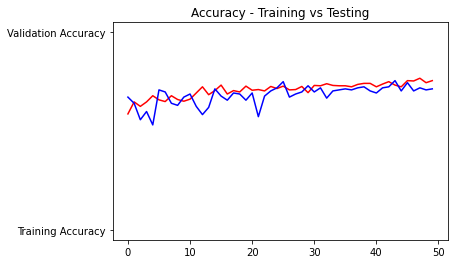

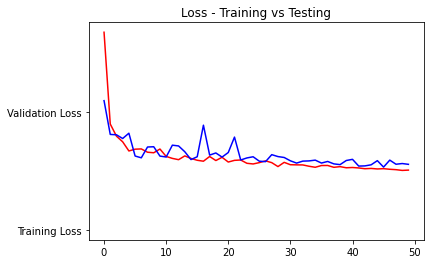

<Figure size 432x288 with 0 Axes>

In [19]:
plot_acc_loss(history)

In [21]:
history = fit_model(train_dataset, test_dataset, epochs=50, layer_nodes=[10,20,1])

Train for 576 steps, validate for 192 steps
Epoch 1/50
576/576 [==============================] - 2s 3ms/step - loss: 2.1746 - accuracy: 0.5903 - val_loss: 0.9765 - val_accuracy: 0.6406
Epoch 2/50
576/576 [==============================] - 1s 2ms/step - loss: 0.9190 - accuracy: 0.6042 - val_loss: 0.8178 - val_accuracy: 0.6667
Epoch 3/50
576/576 [==============================] - 1s 2ms/step - loss: 0.8105 - accuracy: 0.6510 - val_loss: 1.0000 - val_accuracy: 0.4479
Epoch 4/50
576/576 [==============================] - 1s 2ms/step - loss: 0.8846 - accuracy: 0.6476 - val_loss: 0.6858 - val_accuracy: 0.6719
Epoch 5/50
576/576 [==============================] - 1s 2ms/step - loss: 0.7546 - accuracy: 0.6545 - val_loss: 0.8246 - val_accuracy: 0.6406
Epoch 6/50
576/576 [==============================] - 1s 2ms/step - loss: 0.7232 - accuracy: 0.6649 - val_loss: 0.8500 - val_accuracy: 0.6458
Epoch 7/50
576/576 [==============================] - 1s 2ms/step - loss: 0.6808 - accuracy: 0.6528 - va

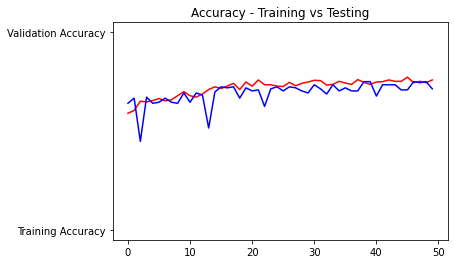

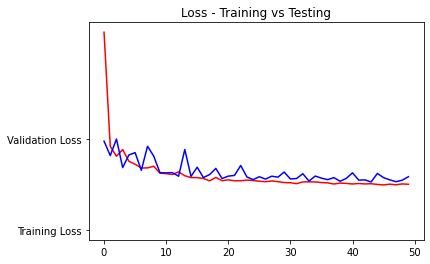

<Figure size 432x288 with 0 Axes>

In [22]:
plot_acc_loss(history)